# Discussion Questions
### 1A. How many pairwise particle-particle interactions will there be for a given number of particles?
* There will be `1` for 2 particles
* There will be `3` for 3 particles
* There will be `6` for 4 particles
* There will be `10` for 5 particles
* There will be `45` for 10 particles
* There will be `4950` for 100 particles
### 1B. Is a cutoff value of 3 appropriate?
Without a cutoff, the total energy calculated of the sample configuration is `-3582.239`. With the cutoff, the calculated energy is `-3487.454`. This difference is `2.6%` so this should be an appropriate cutoff.
### 2. What are the benefits associated with using a cutoff? What could be the drawbacks?
A cutoff can significantly cut down the number of calculations to improve performance since this could be a very expensive process. A drawback could be that the wrong cutoff value is set leading to significant errors in your calculation.
### 3A. What is the maximum distance any particle can be from another in each dimension in a box of length 10σ?
The maximum distance is `5σ in each dimension`. That would be a maximum length of 5sqrt(3)σ = ~8.66σ.
### 3B. What is the actual distance between points (0, 0, 0) and (0, 0, 8)?
The actual distance between the two points is `2σ`.




# Task 1 - Alternate Initial Configuration - Random Points

In [10]:
# Generate sample configuration with parameters of number of particles and a desired system density
import random
import math
import matplotlib.pyplot as plt

def sample_config(num_particles, density):
    """
    Parameters
    ----------
    num_particles : integer
        The number of particles to generate 3D coordinates for
    density : float
        The density of particles in a box with (num_particles/volume)

    Returns
    -------
    coordinates : list
        A list of randomly generated coordinates [x , y , z] with length == num_particles
    box_length : float
        Calculated length of a box (num_particles/density)**(1/3)
    """

    # Create empty list to store coordinates
    coordinates = []

    # calculate the box length give number of particles and density
    box_length = math.pow(num_particles/density, (1/3))

    # Generate the points and add to coordinates list
    for i in range(num_particles):
        x_pos = random.uniform(0, box_length)
        y_pos = random.uniform(0, box_length)
        z_pos = random.uniform(0, box_length)
        particle_coordinates = [x_pos, y_pos, z_pos]
        coordinates.append(particle_coordinates)

    return coordinates, box_length

[[4.728763207257771, 9.131573299397886, 3.336389746166111], [8.855860701480474, 9.328302241061776, 7.763568503987204], [3.5461402670470648, 8.534480855449099, 0.6284634985476921], [8.124936005347935, 5.474294300699192, 3.9625245988071303], [5.625623263057426, 7.709298214944865, 9.402201055093432], [8.714553970408488, 6.758567173155213, 9.938491012229669], [9.912437295706672, 3.8518884569660843, 6.246545098399364], [0.4785418894016634, 3.8330568594950214, 6.032031348286376], [6.0759857623274725, 2.4920708811420753, 3.7313808872482506], [0.2538348311870164, 8.50631854605477, 7.506776651878946], [2.4175996674764186, 6.418534850450074, 7.289624618316621], [0.7584194147120059, 3.544693794354283, 4.4139448308529605], [8.872465626836696, 5.084899597903192, 6.484207202438079], [5.747358053329612, 1.2969737472401919, 6.0748139875402885], [8.032113986883163, 3.998351545769875, 7.6603385734699065], [0.20261268520141537, 9.964304073731752, 3.706313477292498], [1.0691481945770573, 3.553697445248291

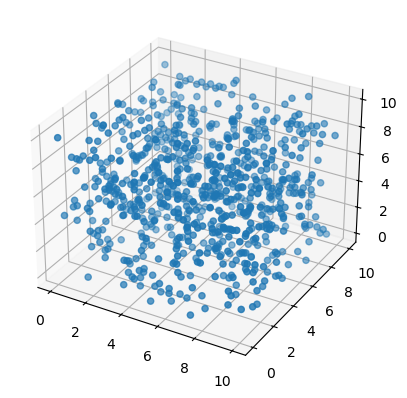

In [13]:
# Generate coordinate points for the number of particles
points, length = sample_config(800,0.8)

# Check that the box_length is close enough to expected
assert math.isclose(length,10, rel_tol=0.1)

# Check that the right number of points were generated
assert len(points) == 800

# Display points
print(points)
x = []
y = []
z = []
for point in points:
    x.append(point[0])
    y.append(point[1])
    z.append(point[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

## Reflection
### Approach
The goal was to get a list of randomly generated [x, y, z] points for some number of particles with a given density in a box. The `box_length` was calculated by taking the cubed root of `num_particles` / `density`. From here, a random number between 0 and `box_length` was generated for each dimension to create a point. The point was then added to the `coordinates` list. Checks were added to make sure that the coordinates made sense. A 3D scatterplot was created to visualize the points as an additional check.
### Observations
This is a pretty straightforward function. It is very useful to be able to rapidly spin up randomly generated sets of points. 

# Task 2 - Alternate Initial Configuration - Cubic Lattice

In [3]:
import matplotlib.pyplot as plt

def lattice_sample_config(num_particles, density):
    """
    Parameters
    ----------
    num_particles : integer
        The number of particles to generate 3D coordinates for
    density : float
        The density of particles in a box with (num_particles/volume)

    Returns
    -------
    coordinates : list
        A list of randomly generated coordinates [x , y , z] with length == num_particles
    box_length : float
        Calculated length of a box (num_particles/density)**(1/3)
    """
    
    # Calculate box_length, particles per axis and spacing to build lattice framework
    # Round down to nearest integer for particles per axis to ensure lattice structure
    box_length = math.pow(num_particles/density, (1/3))
    particles_per_axis = math.floor(math.pow(num_particles,(1/3)))
    spacing = box_length/particles_per_axis
    
    # create empty lists to store all coordinates
    coordinates = []

    # create evenly spaced points along all 3 axes
    x_pos = []
    y_pos = []
    z_pos = []
    for i in range(particles_per_axis):
        x_val = (i)*spacing
        x_pos.append(x_val)
    for i in range(particles_per_axis):
        y_val = (i)*spacing
        y_pos.append(y_val)
    for i in range(particles_per_axis):
        z_val = (i)*spacing
        z_pos.append(z_val)
   
    # use the evenly spaced points on the axes to build the lattice structure
    for i in range(len(x_pos)):
        for j in range(len(y_pos)):
            for k in range(len(z_pos)):
                particle_coordinates = [x_pos[i], y_pos[j], z_pos[k]]
                coordinates.append(particle_coordinates)

    return coordinates, box_length

729


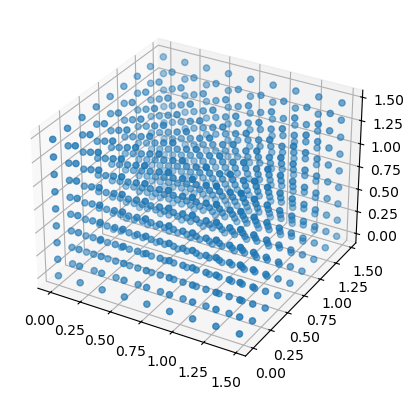

In [14]:
# run the function and display the lattice structure
points, length = lattice_sample_config(900,200)
print(len(points))
x = []
y = []
z = []
for point in points:
    x.append(point[0])
    y.append(point[1])
    z.append(point[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

## Reflection
### Approach
The goal of this was to create points on a simple lattice given the number of particles and density. To do this, I determined that I need to find how many particles would need to be on each axis and determine their spacing based on the `box_length`. I created lists for each axis to get the proper spacing values. From those lists, I used nested `for` loops to create the appropriate lattice structure coordinates. I added a 3D scatterplot to visualize it.
### Observations
I noticed that lattices require a particular number of particles, so I rounded down to an `integer` when calculating the number of particles on an axis. This allows any input to be appropriately scaled to a number that creates a lattice structure. 